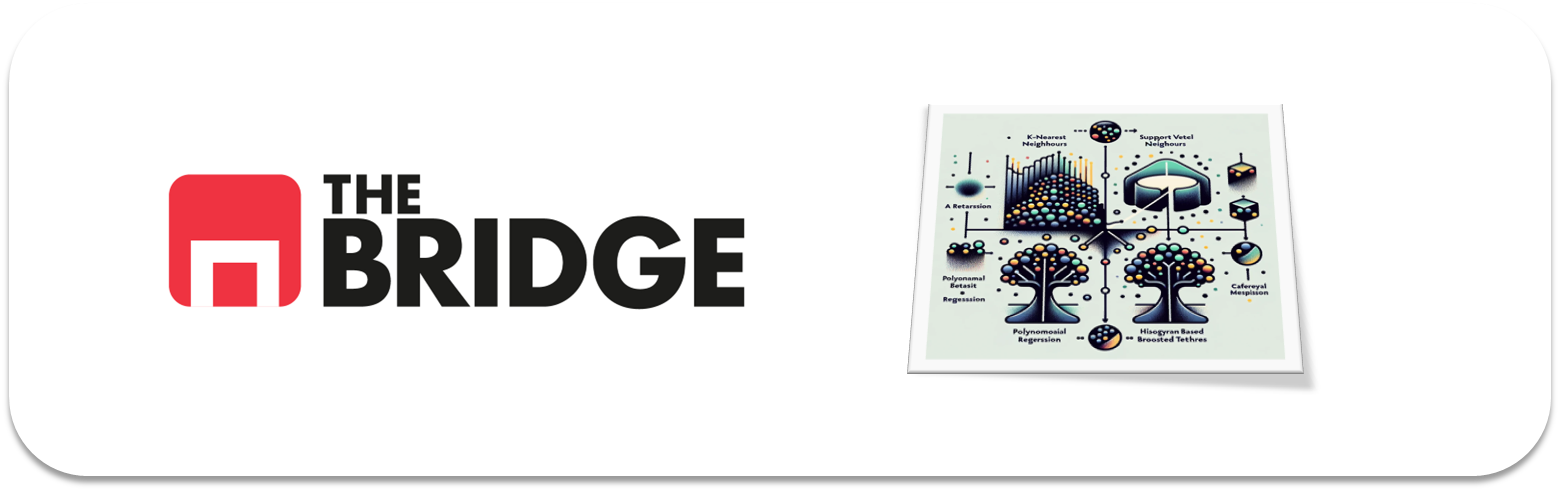

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bootcampviztools
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE # Nuevos amigos para ayudaros
from imblearn.under_sampling import RandomUnderSampler # Nuevos amigos para ayudarnos
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [394]:
df_vino = pd.read_csv("./data/wines_dataset.csv", delimiter="|")

In [395]:
df_vino.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [396]:
df_vino.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [397]:
df_vino.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [398]:
def describe_df(df):

    resumen = pd.DataFrame({
        'Tipo de dato': df.dtypes,
        'Porcentaje de nulos': round(df.isnull().mean() * 100,2),
        'Valores únicos': df.nunique()
    })
    resumen['Porcentaje de cardinalidad'] = round(resumen['Valores únicos'] / len(df) * 100,2)
    return resumen.transpose()

In [399]:
describe_df(df_vino)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
Tipo de dato,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,object
Porcentaje de nulos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valores únicos,106,187,89,316,214,135,276,998,108,111,111,7,2
Porcentaje de cardinalidad,1.63,2.88,1.37,4.86,3.29,2.08,4.25,15.36,1.66,1.71,1.71,0.11,0.03


In [400]:
def tipifica_variable(data: pd.DataFrame, umbral_categoria: int, umbral_continua: float) -> pd.DataFrame:
 
    dic_tip_var = {}
    for key in data:
        cardi = data[key].nunique()
        if cardi == 2:
            dic_tip_var[key] = "Binaria"
        elif cardi < umbral_categoria:
            dic_tip_var[key] = "Categórica"
        elif cardi / len(data[key]) * 100 >= umbral_continua:
            dic_tip_var[key] = "Numérica Continua"
        else:
            dic_tip_var[key] = "Numérica Discreta"
        
        hay_nulos = data[key].isnull().sum()
        if hay_nulos != 0:
            print(f'OJO! En la columna "{key}" hay valores nulos.')

    return pd.DataFrame({"tipo_sugerido": dic_tip_var})

In [401]:
tipifica_variable(data=df_vino, umbral_categoria=10, umbral_continua=20)

,tipo_sugerido
fixed acidity,Numérica Discreta
volatile acidity,Numérica Discreta
citric acid,Numérica Discreta
residual sugar,Numérica Discreta
chlorides,Numérica Discreta
free sulfur dioxide,Numérica Discreta
total sulfur dioxide,Numérica Discreta
density,Numérica Discreta
pH,Numérica Discreta
sulphates,Numérica Discreta


In [402]:

# Mapear la variable binaria a valores numéricos
df_vino['class'] = df_vino['class'].map({'white': 1, 'red': 0})

# Imprimir los resultados
print(df_vino)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               8.5              0.21         0.26            9.25      0.034   
1               8.3              0.16         0.37            7.90      0.025   
2               6.8              0.18         0.38            1.40      0.038   
3               6.1              0.26         0.25            2.90      0.047   
4               7.5              0.63         0.27            2.00      0.083   
...             ...               ...          ...             ...        ...   
6492            7.7              0.39         0.34           10.00      0.056   
6493            8.2              0.73         0.21            1.70      0.074   
6494            7.4              0.31         0.48           14.20      0.042   
6495            8.3              0.65         0.10            2.90      0.089   
6496            8.4              0.67         0.19            2.20      0.093   

      free sulfur dioxide  

In [403]:
X = df_vino.drop("quality",axis=1)
y = df_vino.quality

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


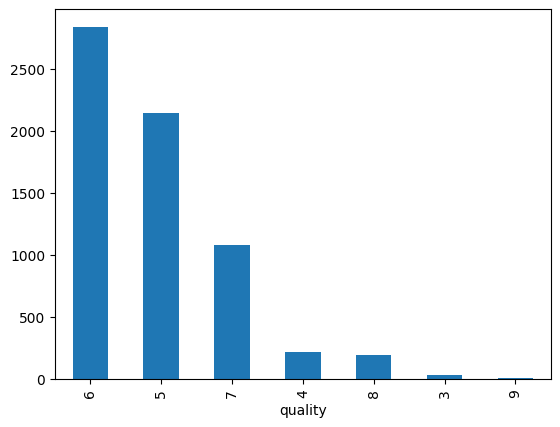

In [404]:
print(y.value_counts())
y.value_counts().plot(kind='bar')
plt.show()

In [405]:
train_set, test_set = train_test_split(df_vino, test_size= 0.2, stratify= df_vino["quality"], random_state= 42)

In [406]:
train_set["quality"].value_counts(normalize = True)

quality
6    0.436598
5    0.329036
7    0.166057
4    0.033288
8    0.029632
3    0.004618
9    0.000770
Name: proportion, dtype: float64

In [407]:
test_set["quality"].value_counts(normalize = True)

quality
6    0.436154
5    0.329231
7    0.166154
4    0.033077
8    0.030000
3    0.004615
9    0.000769
Name: proportion, dtype: float64

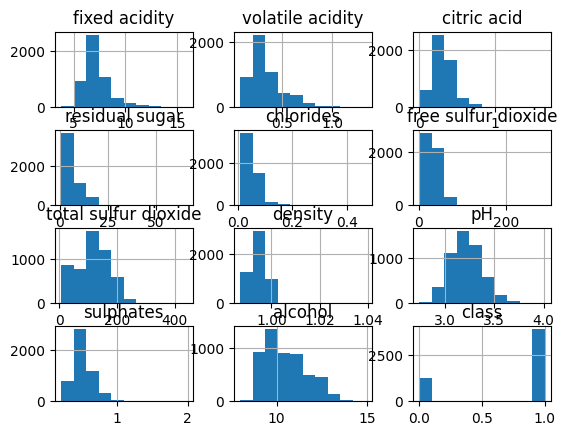

In [408]:
train_set.drop("quality", axis = 1).hist()
plt.show()

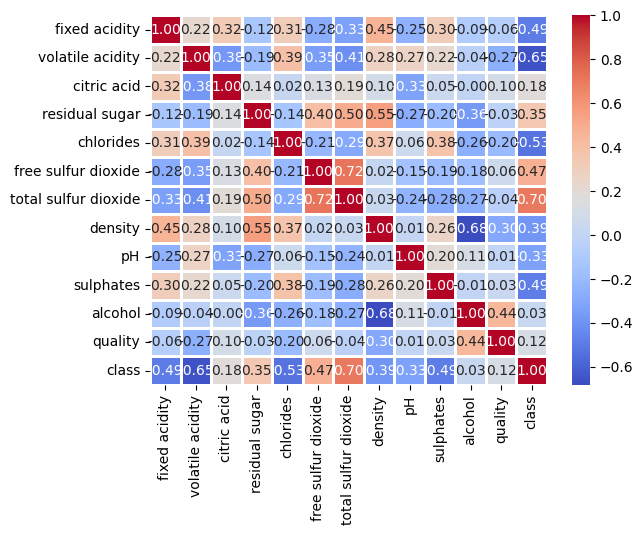

In [409]:

# Calcula la matriz de correlación
corr_matrix = train_set.corr()

# Crea el mapa de calor utilizando seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',linewidths=0.9,fmt='.2f')

# Muestra el mapa de calor
plt.show()

In [410]:
features = train_set.drop(["fixed acidity","free sulfur dioxide","pH","sulphates","quality"], axis = 1).columns.to_list()
print(features)

['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'alcohol', 'class']


In [411]:
from sklearn.preprocessing import StandardScaler

# Verifica si hay valores infinitos en los datos
train_set = train_set.replace([np.inf, -np.inf], np.nan)
train_set = train_set.dropna()



In [412]:
y_train = train_set["quality"] -3
y_test = test_set["quality"] -3

In [413]:
scaler = StandardScaler()
scaler.fit(train_set[features]) # Adaptamos el StandarScaler al Train, pero luego usamos el mismo en el test (porque ya la media y la desviación son las del train)
X_train = pd.DataFrame(scaler.transform(train_set[features]), columns = features)
X_test = pd.DataFrame(scaler.transform(test_set[features]), columns= features)
X_train.describe()

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,alcohol,class
count,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03
mean,-4.375095e-17,-1.209987e-16,-1.121118e-16,1.948284e-16,5.332147e-17,-6.153844e-15,2.153367e-16,-7.793138e-17
std,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00
min,-1.588689e+00,-2.188794e+00,-1.013442e+00,-1.382385e+00,-1.942577e+00,-2.535681e+00,-2.091556e+00,-1.742107e+00
25%,-6.682072e-01,-5.358377e-01,-7.631162e-01,-5.288475e-01,-6.889806e-01,-7.758709e-01,-8.257193e-01,5.740175e-01
50%,-3.000143e-01,-5.372557e-02,-5.127902e-01,-2.639565e-01,3.492696e-02,6.910382e-02,-1.506063e-01,5.740175e-01
75%,3.750060e-01,4.972597e-01,5.510954e-01,2.658254e-01,7.058657e-01,7.543983e-01,6.932851e-01,5.740175e-01
max,6.081996e+00,9.244151e+00,1.258760e+01,1.209762e+01,5.720250e+00,1.471977e+01,3.731294e+00,5.740175e-01


In [414]:
clf = LogisticRegression(max_iter=10000) 

clf.fit(X_train, y_train) # No hay que decir nada en especial, el detecta el tipo de clasificador multicategórico y aplica el one-vs-rest o one-vs-all

LogisticRegression(max_iter=10000)

In [415]:
clf.predict(X_train)

array([3, 3, 2, ..., 4, 3, 3], dtype=int64)

In [416]:
clf.predict_proba(X_train)

array([[4.88744197e-03, 5.18851388e-02, 2.99209440e-01, ...,
        1.48641872e-01, 1.55673479e-02, 8.52520461e-04],
       [4.66763861e-04, 8.75177083e-03, 3.42229754e-01, ...,
        1.18362479e-01, 2.32765970e-03, 2.34136436e-05],
       [2.76404853e-02, 2.34054387e-02, 7.80467939e-01, ...,
        5.47255567e-03, 2.52953488e-04, 3.78448545e-06],
       ...,
       [7.64685878e-04, 5.84279476e-03, 4.06435444e-02, ...,
        4.40478530e-01, 1.02086789e-01, 2.38477417e-03],
       [1.19468361e-03, 9.78809859e-03, 1.40863965e-01, ...,
        2.24654575e-01, 5.79837148e-02, 6.26453368e-04],
       [3.06804357e-04, 3.71118548e-03, 1.05822627e-01, ...,
        3.27779059e-01, 1.05758632e-02, 1.26877123e-04]])

In [417]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train, clf.predict(X_train))
print(acc_train)

0.5378102751587455


In [418]:
from sklearn import model_selection
name='Logistic Regression'
cv_results = model_selection.cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

c:\Users\raul_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[0.51538462 0.52211538 0.53705486 0.54764196 0.5466795 ]
Logistic Regression: 0.533775 (0.012990)


In [419]:
from sklearn import model_selection
name='Logistic Regression'
cv_results = model_selection.cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

c:\Users\raul_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[0.51538462 0.52211538 0.53705486 0.54764196 0.5466795 ]
Logistic Regression: 0.533775 (0.012990)


In [420]:
y_proba = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

In [421]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[f"Real {i}" for i in clf.classes_], 
                  columns=[f"Predicho {i}" for i in clf.classes_])

cm

,Predicho 0,Predicho 1,Predicho 2,Predicho 3,Predicho 4,Predicho 5,Predicho 6
Real 0,0,1,1,4,0,0,0
Real 1,0,5,23,14,1,0,0
Real 2,0,1,259,164,3,1,0
Real 3,0,0,120,413,34,0,0
Real 4,0,0,12,157,47,0,0
Real 5,0,0,1,25,13,0,0
Real 6,0,0,0,0,1,0,0


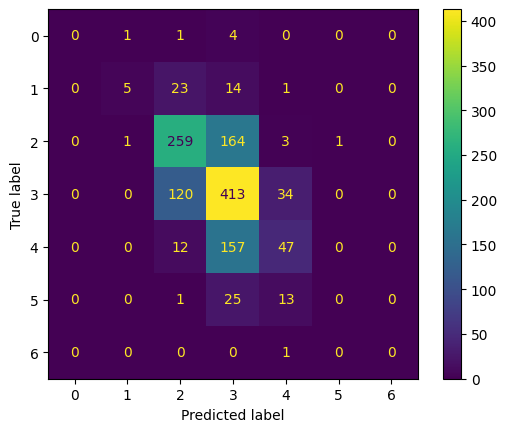

In [422]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

c:\Users\raul_\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


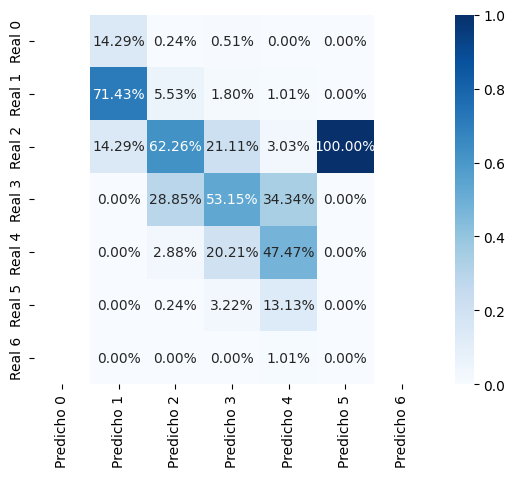

In [423]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues');

In [424]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, balanced_accuracy_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay

In [425]:
micro_prec = precision_score(y_test, y_pred, average="micro")
print("MICRO PRECISION:", micro_prec)

macro_prec = precision_score(y_test, y_pred, average="macro")
print("MACRO PRECISION:", macro_prec)

micro_rec = recall_score(y_test, y_pred, average="micro")
print("MICRO RECALL:", micro_rec)

macro_rec = recall_score(y_test, y_pred, average="macro")
print("MACRO RECALL:", macro_rec)

micro_acc = accuracy_score(y_test, y_pred)
print("MICRO ACCURACY:", micro_acc)

MICRO PRECISION: 0.556923076923077
MACRO PRECISION: 0.3347372677729821
MICRO RECALL: 0.556923076923077
MACRO RECALL: 0.23820098728633107
MICRO ACCURACY: 0.556923076923077


c:\Users\raul_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [426]:
acierto = accuracy_score(y_test, y_pred)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 55.69 %
Error: 44.31 %


In [427]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.71      0.12      0.20        43
           2       0.62      0.61      0.61       428
           3       0.53      0.73      0.61       567
           4       0.47      0.22      0.30       216
           5       0.00      0.00      0.00        39
           6       0.00      0.00      0.00         1

    accuracy                           0.56      1300
   macro avg       0.33      0.24      0.25      1300
weighted avg       0.54      0.56      0.53      1300



c:\Users\raul_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\raul_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\raul_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [428]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

model_names = ["Logistic Regression","DecisionTree","Random Forest","XGBoost","LightGBM","CatBoost","KNN"]
lr_clf = LogisticRegression(max_iter = 10000)
tree_clf = DecisionTreeClassifier(random_state= 42)
rf_clf = RandomForestClassifier(random_state= 42)
xgb_clf = XGBClassifier(random_state = 42)
lgb_clf = LGBMClassifier(random_state= 42, verbose = -100)
cat_clf = CatBoostClassifier(random_state= 42, verbose = False)
knn_clf = KNeighborsClassifier(n_neighbors=5)




model_set = [lr_clf, tree_clf, rf_clf, xgb_clf, lgb_clf, cat_clf,knn_clf]

In [429]:
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(modelo)
    if nombre != "Logistic Regression":
        metricas_cv[nombre] = cross_val_score(modelo, X_train, y_train, cv = 3, scoring = "accuracy")
    else:
        metricas_cv[nombre] = cross_val_score(modelo, X_train, y_train, cv = 3, scoring = "accuracy")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

LogisticRegression(max_iter=10000)
DecisionTreeClassifier(random_state=42)
RandomForestClassifier(random_state=42)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
LGBMClassifier(random_state=42, verbose=-100)
KNeighborsClassifier()


In [430]:
for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, Accuracy_CV: {np.mean(valores)}")
print(f"El ganador es {ganador}")

Model <Logistic Regression>, Accuracy_CV: 0.5310772146180182
Model <DecisionTree>, Accuracy_CV: 0.5618632469292594
Model <Random Forest>, Accuracy_CV: 0.6463356561285768
Model <XGBoost>, Accuracy_CV: 0.6274782146326772
Model <LightGBM>, Accuracy_CV: 0.6272852036299394
Model <CatBoost>, Accuracy_CV: 0.6213206305884903
Model <KNN>, Accuracy_CV: 0.5437757394275947
El ganador es Random Forest


In [435]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params_grid = {
    "n_estimators": [50, 100, 400],
    "max_depth": [10, 20, 60],
    "min_samples_split": [2, 4, 8],
    "min_samples_leaf": [1, 3, 5]
}

rf_clf = RandomForestClassifier(random_state=42)

forest = GridSearchCV(estimator=rf_clf,
                           param_grid=params_grid,
                           cv=3,
                           scoring="accuracy",
                           n_jobs=-1)

forest.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 60],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [50, 100, 400]},
             scoring='accuracy')

In [441]:
forest.best_score_


0.6534554077951569

In [437]:
forest.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 400}

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.57      0.09      0.16        43
           2       0.72      0.70      0.71       428
           3       0.63      0.80      0.71       567
           4       0.72      0.51      0.60       216
           5       1.00      0.33      0.50        39
           6       0.00      0.00      0.00         1

    accuracy                           0.67      1300
   macro avg       0.52      0.35      0.38      1300
weighted avg       0.68      0.67      0.66      1300



c:\Users\raul_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\raul_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\raul_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

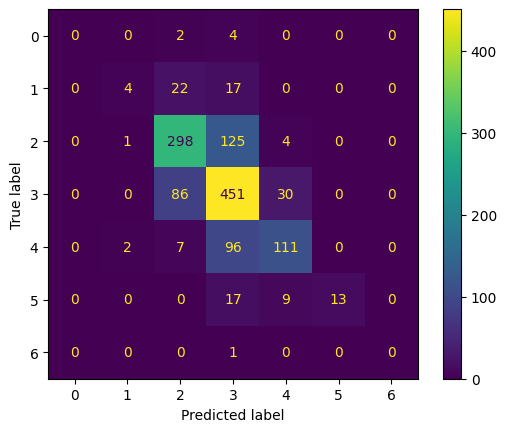

In [443]:

y_pred = forest.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

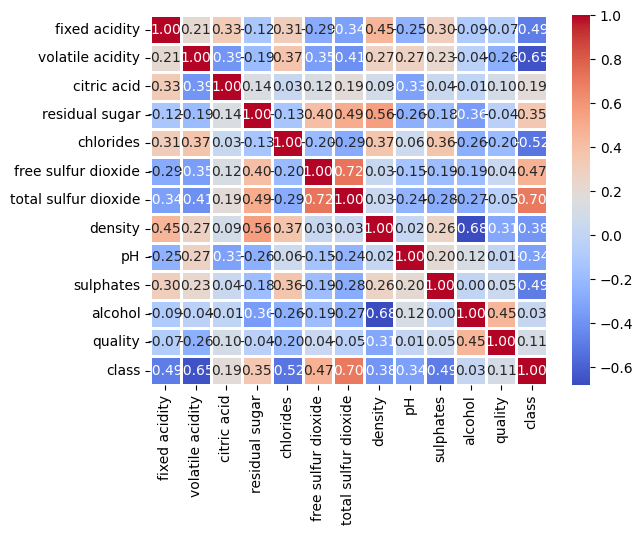

In [453]:
train_set_2, test_set_2 = train_test_split(df_vino, test_size= 0.2, random_state= 42)

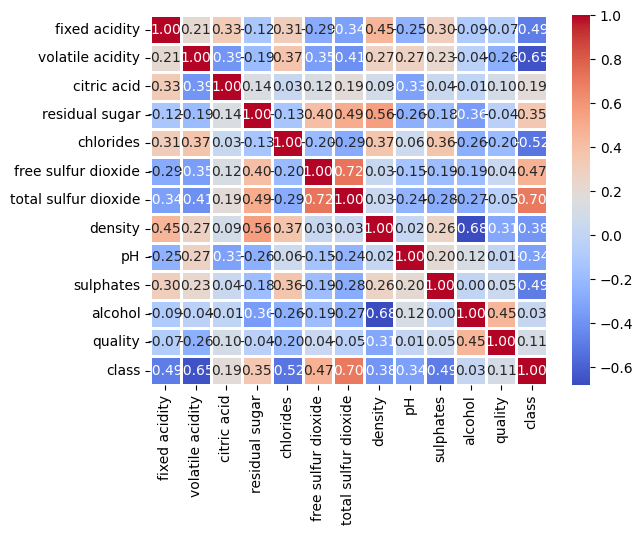

In [454]:
# Calcula la matriz de correlación
corr_matrix = train_set_2.corr()

# Crea el mapa de calor utilizando seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',linewidths=0.9,fmt='.2f')

# Muestra el mapa de calor
plt.show()

In [455]:
features_2 = train_set.drop(["fixed acidity","volatile acidity","citric acid","sulphates","pH","alcohol","class"], axis = 1).columns.to_list()
print(features_2)

['residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'quality']


In [456]:
train_set_2 = train_set_2.replace([np.inf, -np.inf], np.nan)
train_set_2 = train_set_2.dropna()

In [457]:
y_train_2 = train_set["alcohol"]
y_test_2 = test_set["alcohol"]

In [460]:
scaler = StandardScaler()
scaler.fit(train_set_2[features_2]) # Adaptamos el StandarScaler al Train, pero luego usamos el mismo en el test (porque ya la media y la desviación son las del train)
X_train_2 = pd.DataFrame(scaler.transform(train_set_2[features_2]), columns = features_2)
X_test_2 = pd.DataFrame(scaler.transform(test_set_2[features_2]), columns= features_2)
X_train_2.describe()

,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,quality
count,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03
mean,-3.623125e-17,-2.242236e-16,-6.836086e-17,4.238373e-17,5.706764e-14,-4.173430e-16
std,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00
min,-1.017456e+00,-1.339304e+00,-1.642111e+00,-1.929450e+00,-2.524538e+00,-3.236359e+00
25%,-7.665738e-01,-5.430607e-01,-7.533816e-01,-6.970523e-01,-7.815705e-01,-9.391033e-01
50%,-5.156916e-01,-2.674378e-01,-8.683472e-02,4.238644e-02,6.169387e-02,2.095246e-01
75%,5.505578e-01,2.838079e-01,5.797122e-01,7.114024e-01,7.588809e-01,2.095246e-01
max,1.261381e+01,1.700493e+01,1.435501e+01,5.711416e+00,1.469598e+01,3.655408e+00


In [472]:
from sklearn.metrics import mean_squared_error, r2_score

In [473]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
linear_reg = LinearRegression()

# Entrenar el modelo
linear_reg.fit(X_train_2, y_train_2)

# Realizar predicciones
y_pred_2 = linear_reg.predict(X_test_2)
mse = mean_squared_error(y_test_2, y_pred_2)
r2 = r2_score(y_test_2, y_pred_2)

In [474]:
print(y_pred_2)
print(mse)
print(r2)

[ 9.99434265 12.11814968 12.22954653 ... 11.49670344 10.92457175
  9.7337033 ]
0.5551722460275321
0.6060635375081567


In [475]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Convertir características a polinomiales
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_train_2)

# Crear el modelo lineal
poly_reg = LinearRegression()

# Entrenar el modelo
poly_reg.fit(X_poly, y_train_2)

# Transformar características de prueba
X_poly_test = poly_features.transform(X_test_2)

# Realizar predicciones
y_pred_3 = poly_reg.predict(X_poly_test)
mse = mean_squared_error(y_test_2, y_pred_3)
r2 = r2_score(y_test_2, y_pred_3)

In [476]:
print(y_pred_3)
print(mse)
print(r2)

[ 9.9298827  12.38496173 12.37053226 ... 11.36984217 10.76876399
  9.58298983]
0.41059572113047527
0.7086514553747967


In [487]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Crear el modelo
tree_reg = DecisionTreeRegressor()

# Definir la cuadrícula de hiperparámetros
param_grid = {
    "max_depth": [None, 2, 5, 20],
    "min_samples_split": [2, 5, 20],
    "min_samples_leaf": [1, 2, 4, 10]
}

# Realizar búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(estimator=tree_reg, param_grid=param_grid, scoring="neg_mean_squared_error", cv=5)
grid_search.fit(X_train_2, y_train_2)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_

# Crear un nuevo modelo con los mejores hiperparámetros
tree_reg_best = DecisionTreeRegressor(**best_params)

# Entrenar el modelo con los mejores hiperparámetros
tree_reg_best.fit(X_train_2, y_train_2)

# Realizar predicciones con el modelo ajustado
y_pred_4 = tree_reg_best.predict(X_test_2)

In [489]:

mse = mean_squared_error(y_test_2, y_pred_4)
r2 = r2_score(y_test_2, y_pred_4)

In [490]:
print(y_pred_4)
print(mse)
print(r2)

[ 9.72727273 12.87       12.56       ... 11.66363636  9.9125
  9.82666667]
0.3625484659252346
0.7427445965277077


In [491]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Crear el modelo
knn_reg = KNeighborsRegressor()

# Definir la cuadrícula de hiperparámetros
param_grid = {
    "n_neighbors": [5, 7, 9],
    "weights": ["uniform", "distance"],
    "p": [1, 2]
}

# Realizar búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(estimator=knn_reg, param_grid=param_grid, scoring="neg_mean_squared_error", cv=5)
grid_search.fit(X_train_2, y_train_2)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_

# Crear un nuevo modelo con los mejores hiperparámetros
knn_reg_best = KNeighborsRegressor(**best_params)

# Entrenar el modelo con los mejores hiperparámetros
knn_reg_best.fit(X_train_2, y_train_2)

# Realizar predicciones con el modelo ajustado
y_pred_5 = knn_reg_best.predict(X_test_2)

In [492]:

mse = mean_squared_error(y_test_2, y_pred_5)
r2 = r2_score(y_test_2, y_pred_5)

In [493]:
print(y_pred_5)
print(mse)
print(r2)

[10.00615585 12.44179837 12.44248987 ... 11.82445771 10.12093874
  9.4       ]
0.2950171049992052
0.7906631760691292
